Looking at data from runs on Feb 19 and 20


estimating delays explicitly

In [45]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Extra Helper Functions

In [46]:
def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [80]:
# CHANGE THIS CELL ACCORDING TO DATA YOU ARE ANALYZING
"""
19th
964694


20th
971288
971289
971290



"""
NTASKS =80
JOB= ['964694','971288', '971289', '971290']
NUM_JOBS = len(JOB)

Loading all the data we need for analysis

In [81]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 4


{'964694': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-19/964694/load_genvars_delays2.py',
 '971288': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-21/971288/load_genvars_delays2.py',
 '971289': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-21/971289/load_genvars_delays3.py',
 '971290': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-21/971290/load_genvars_delays4.py'}

In [82]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) == NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res)
    else:
        print("Error", job)
        break

0  Job: 964694, lowest MSE:  0.6355656767440925
1  Job: 971288, lowest MSE:  0.587943632378622
2  Job: 971289, lowest MSE:  0.587943632378622
3  Job: 971290, lowest MSE:  0.587943632378622


Plot of MEG time series of Target Data and Correlation Matrix

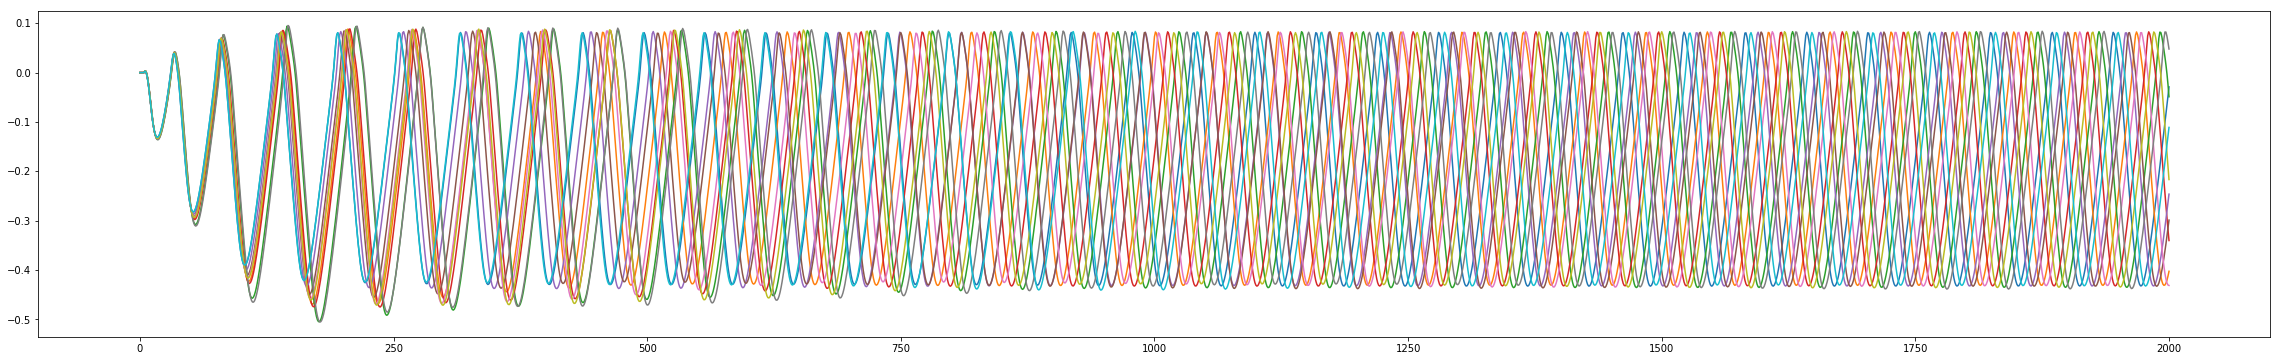

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

exec(open(load_files[JOB[0]]).read())
plot_ts(nodes, ue_array)

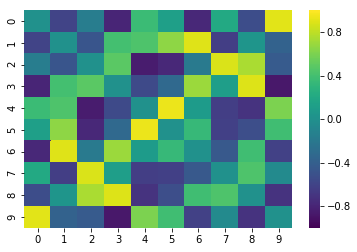

In [84]:
sns.heatmap(targ_data, vmax = 1, vmin = -1, cmap = "viridis")

In [85]:
delays_mat

array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]], dtype=int32)

# STARTING ANALYSIS

Plotting all histograms of all the conduction vel / weights estimates

1 JOB #:  964694 min: 1.0877883753956392 max: 4.862761670130649 avg: 3.0139405310918677
2 JOB #:  971288 min: 1.144529304255492 max: 4.977068964603124 avg: 3.2827856680417318
3 JOB #:  971289 min: 1.144529304255492 max: 4.977068964603124 avg: 3.2827856680417318
4 JOB #:  971290 min: 1.144529304255492 max: 4.977068964603124 avg: 3.2827856680417318


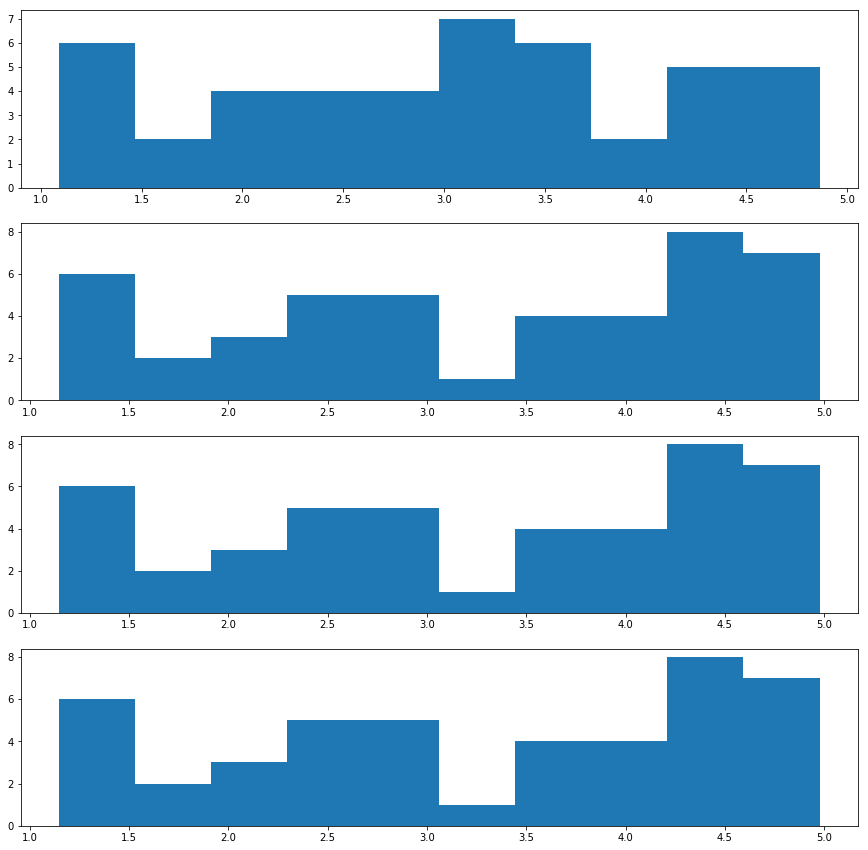

In [86]:
plt.figure(figsize=(15.0,15.0))
for i in range(NUM_JOBS): 
    plt.subplot(NUM_JOBS, 1, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    plt.hist(all_res[JOB[i]])
    #row major counting


In [ ]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure

top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

Looking at solution matrices

JOB #: 964694, max: 4.862761670130649 min: 1.0877883753956392
JOB #: 971288, max: 4.977068964603124 min: 1.144529304255492
JOB #: 971289, max: 4.977068964603124 min: 1.144529304255492
JOB #: 971290, max: 4.977068964603124 min: 1.144529304255492


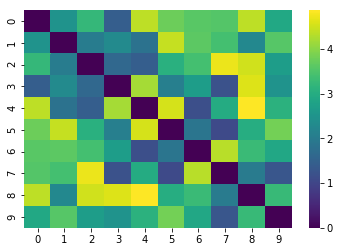

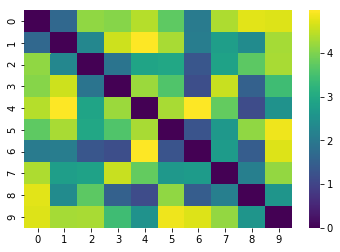

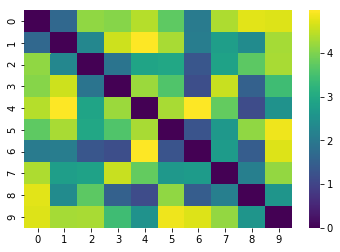

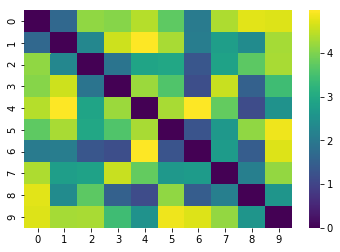

In [87]:
# ALL THE RESULTS AT ONCE

for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    ind = 0
    mat = np.ones((nodes, nodes))
    for row in range(0,nodes):
        for col in range(row+1, nodes):
            mat[row,col] = all_res[JOB[i]][ind]
            mat[col,row] = all_res[JOB[i]][ind]
            ind += 1
    np.fill_diagonal(mat,0)
    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))
    plt.figure()
    sns.heatmap(mat, cmap = "viridis")

In [ ]:
"""
    if plot == "corr":
        np.fill_diagonal(exp_data, 0)
        plot_mat(exp_data,"opt corr", 1, -1)
        print("MSE", res)
    if plot == "delay":
        plot_mat(delays,"Delays")
    if plot == "cw":
        if optim =="c":
            plot_mat(cmat, "opt c",  0.0005, 0)
        if optim =="w":
            plot_mat(wmat, "opt w", 0, 1)
"""
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    
    if evol_params['optim'] =='w':
        MAT = c_mat
    elif evol_params['optim'] =='c':
        MAT = w_mat
        hf.residuals_cw_corr(all_res[JOB[i]], wc_params, targ_data, nodes, tract_mat, MAT, skip, 
                         wc_seed, evol_params['optim'],plot = "corr")
    elif evol_params['optim'] =='d':
        MAT = w_mat
        hf.residuals_cw_corr(all_res[JOB[i]], wc_params, nodes, targ_data, MAT, skip, wc_seed, evol_params['optim'], None,
                evol_params['heavi'], 'corr')

    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(all_res[JOB[i]]), np.min(all_res[JOB[i]])))
    

In [66]:
evol_params['optim']

'd'

In [67]:
d = hf.p2matrix(all_res[JOB[0]],10).astype(int)

4 4
2001
constant


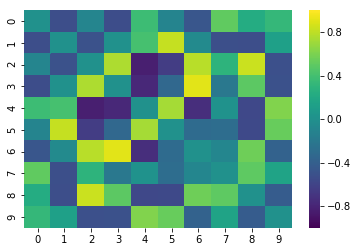

In [68]:
ue_array, _, delays = hf.wcm.wc_model_sim_d(wc_params, d, w_mat, nodes, seed_num= wc_seed)
exp_data = hf.plot_cor_mat(ue_array, nodes, skip)
np.fill_diagonal(exp_data, 0)
sns.heatmap(exp_data, vmax = 1, vmin = -1, cmap = "viridis")

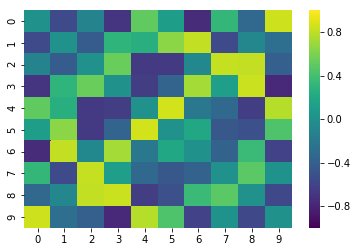

In [69]:
sns.heatmap(targ_data, vmax = 1, vmin = -1, cmap = "viridis")

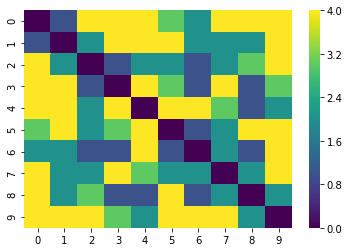

In [70]:
sns.heatmap(d, cmap = "viridis")

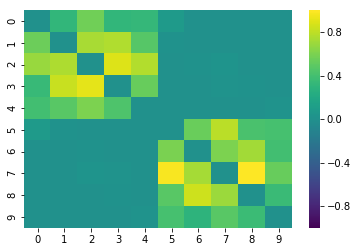

In [71]:
sns.heatmap(w_mat, vmax = 1, vmin = -1, cmap = "viridis")

Conclusion: Delays are not uniform like expected but they do seem darker in areas where there is less weight/myelin
- it also sort of follows pattern of correlation matrix